<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




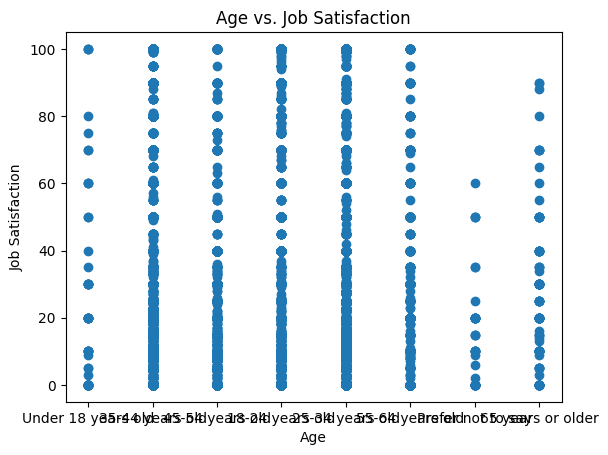

In [3]:
plt.scatter(df['Age'], df['JobSatPoints_6'])
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


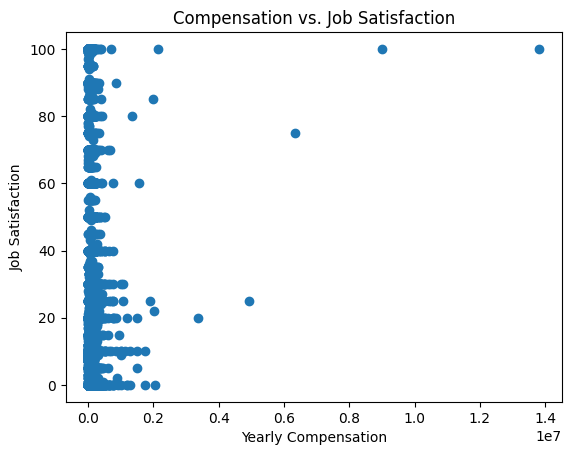

In [4]:
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'])
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [12]:
# Example: If 'Age' has values like "25-30"
df['Age'] = df['Age'].apply(lambda x: float(x.split('-')[0]) if isinstance(x, str) and '-' in x else x)
# Convert to numeric, set errors='coerce' to turn invalid values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with NaN (optional)
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6'])

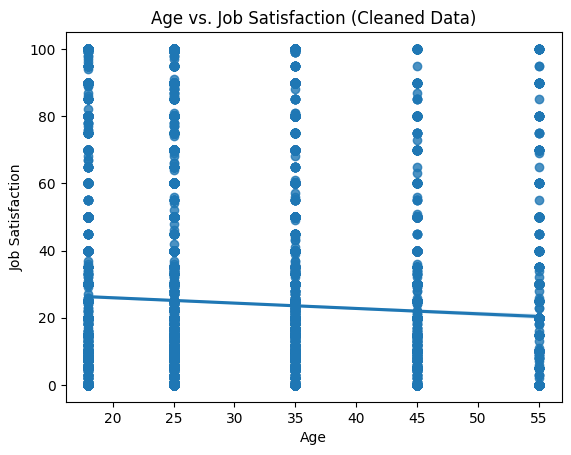

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Age', y='JobSatPoints_6', data=df_clean)
plt.title('Age vs. Job Satisfaction (Cleaned Data)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


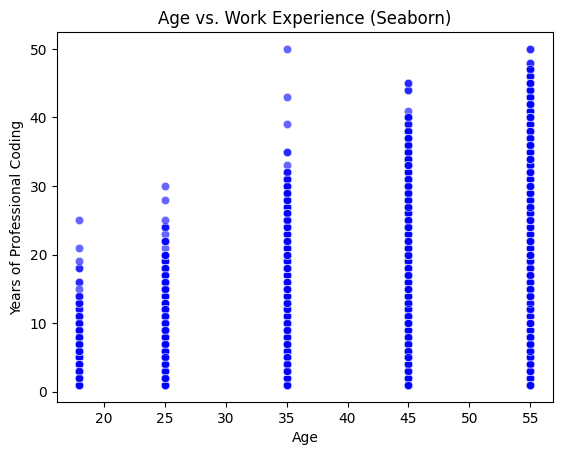

In [18]:
import seaborn as sns

sns.scatterplot(x='Age', y='YearsCodePro', data=df_clean, alpha=0.6, color='blue')
plt.title('Age vs. Work Experience (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


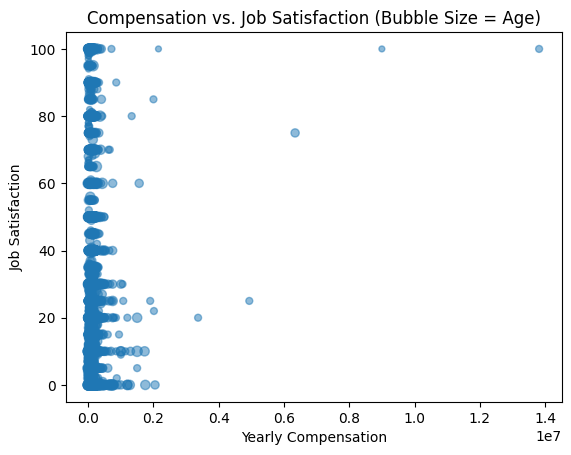

In [19]:
# Clean data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Create bubble plot
plt.scatter(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    s='Age',  # Bubble size based on Age
    data=df_clean,
    alpha=0.5
)
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


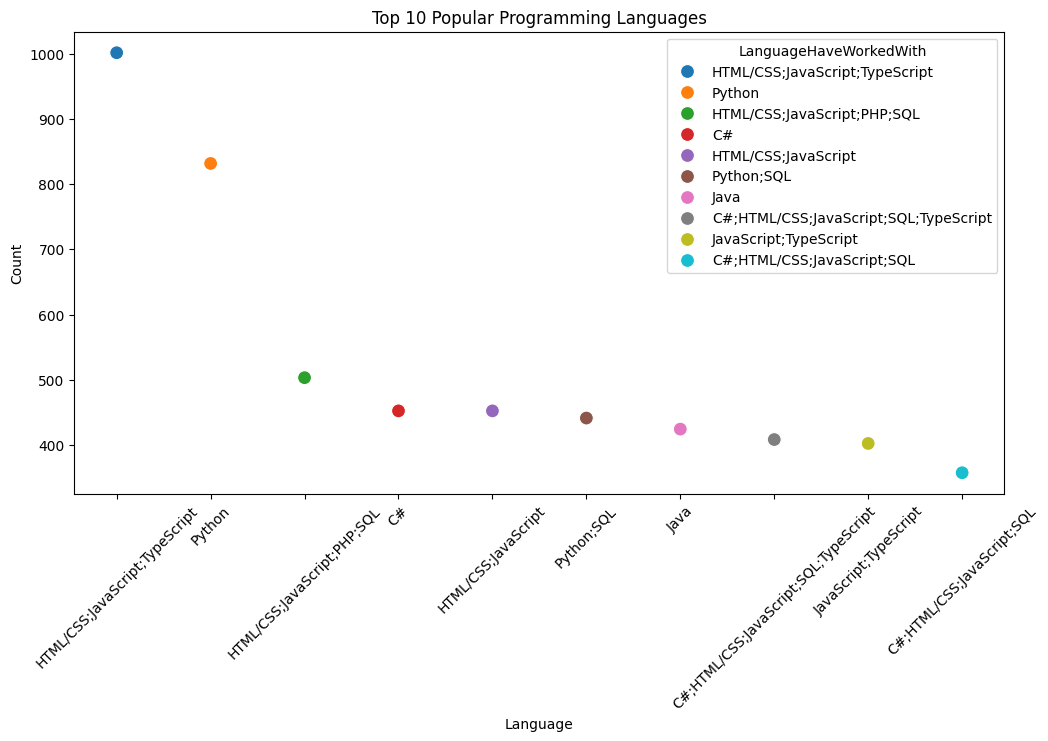

In [20]:
# First, count language occurrences (assuming comma-separated languages)
languages = df['LanguageHaveWorkedWith'].str.split(',').explode()
language_counts = languages.value_counts().head(10)  # Top 10 languages

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=language_counts.index, 
    y=language_counts.values, 
    hue=language_counts.index,
    s=100  # Marker size
)
plt.title('Top 10 Popular Programming Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


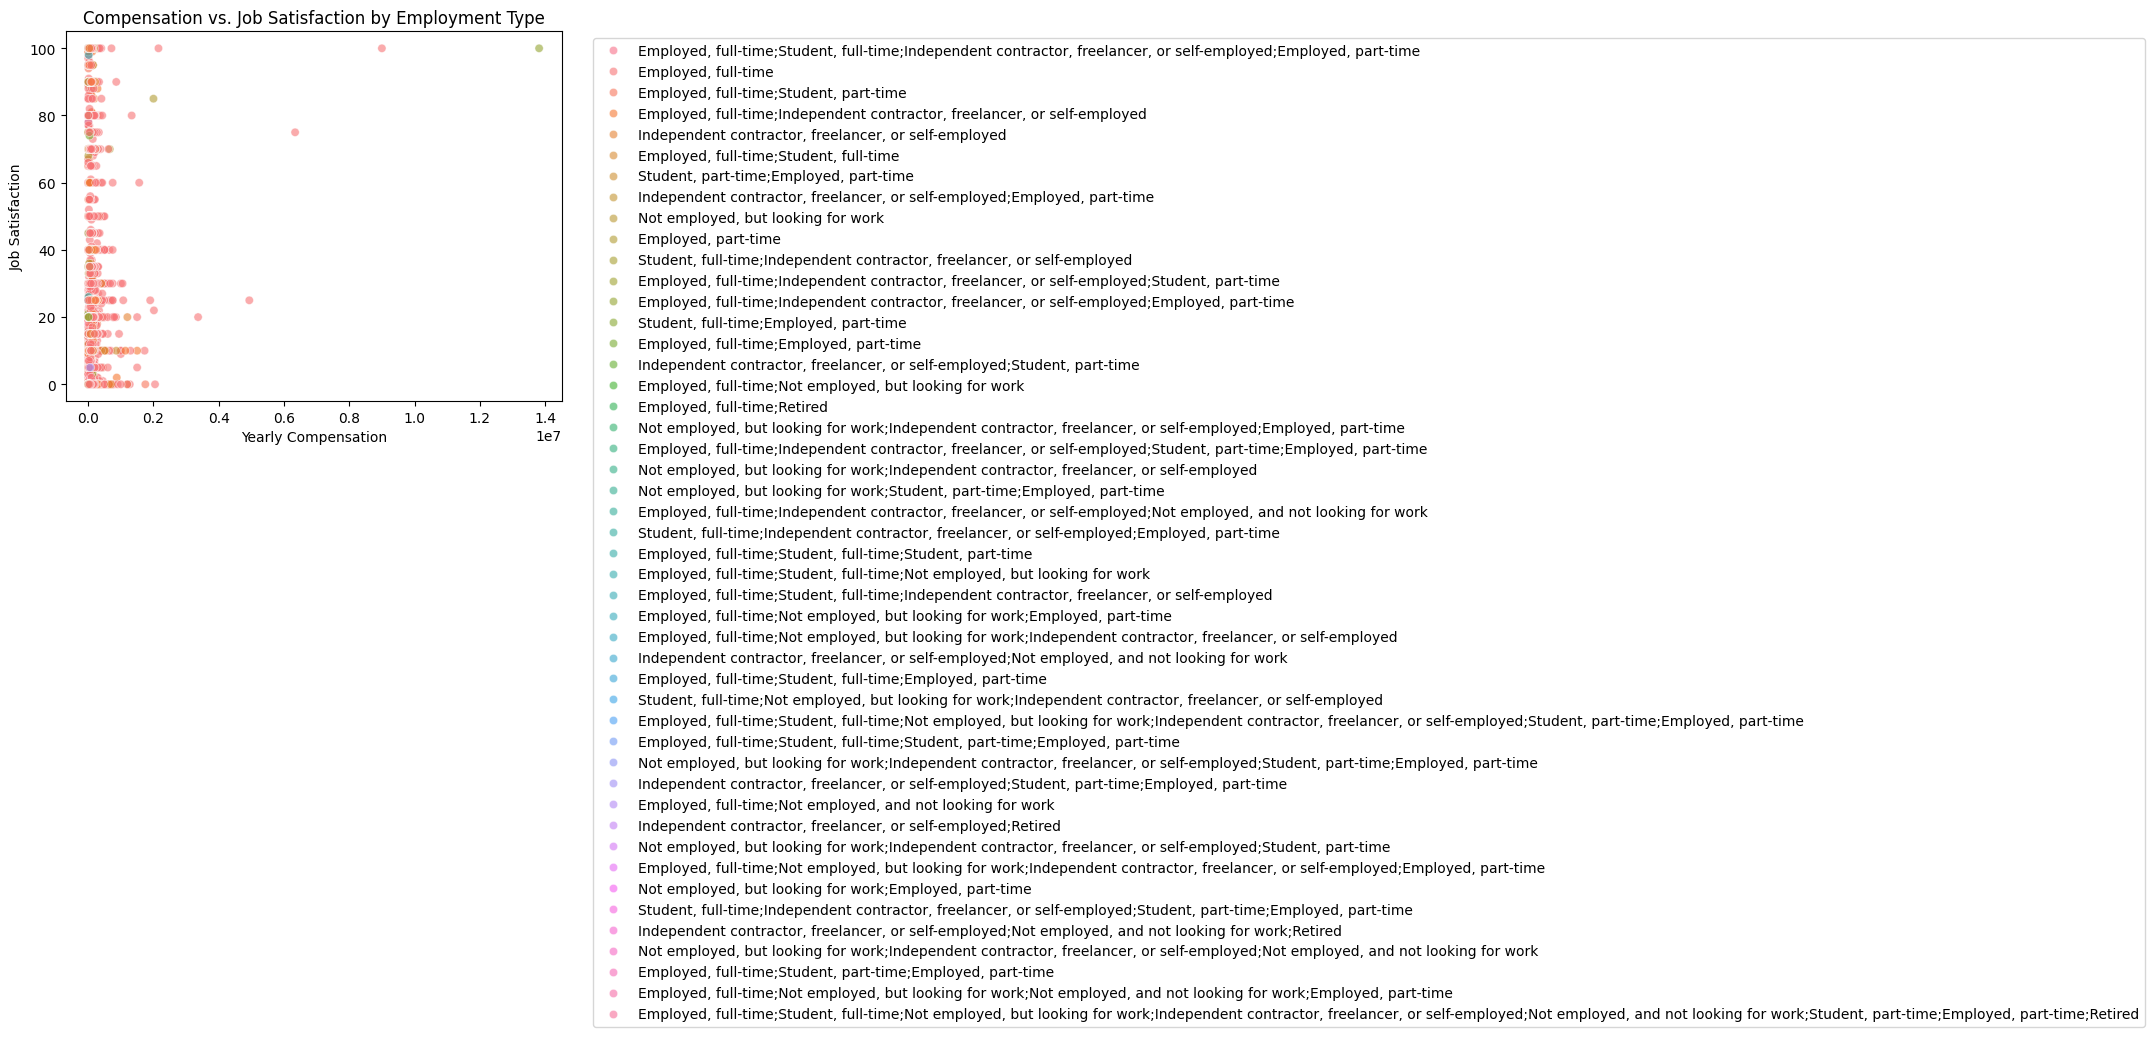

In [21]:
# Clean data
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Plot
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    hue='Employment',  # Color by employment type
    data=df_clean,
    alpha=0.6
)
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1))  # Move legend outside
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


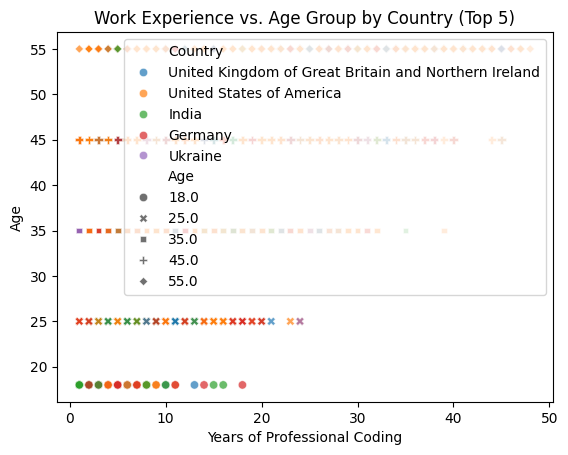

In [22]:
# Clean data
df_clean = df.dropna(subset=['YearsCodePro', 'Age', 'Country'])

# Plot top 5 countries for clarity
top_countries = df_clean['Country'].value_counts().head(5).index
df_filtered = df_clean[df_clean['Country'].isin(top_countries)]

sns.scatterplot(
    x='YearsCodePro', 
    y='Age', 
    hue='Country',  # Color by country
    style='Age',    # Marker style by age group
    data=df_filtered,
    alpha=0.7
)
plt.title('Work Experience vs. Age Group by Country (Top 5)')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Age')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
